## Import Dependencies
matplotlib for drawing graph library based GTK

scikit for Label encoder

Here I will try to visualize the correlation between {loan_status, principal, terms, age, education, gender}

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import seaborn for nice visualization, I am not very much like seaborn, too abstract
import seaborn as sns

# settings for matplotlib
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()

# change string into int
from sklearn.preprocessing import LabelEncoder

# standardize into unit-variance, each value divide by variance
from sklearn.preprocessing import StandardScaler

# 'spring' related data into low dimension
from sklearn.manifold import TSNE

In [2]:
dataset = pd.read_csv('/home/huseinzol05/AI/visualization/loan/Loan payments data.csv')
dataset.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
#remove ID, dates, past_due_days
columns = ['Loan_ID', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days']
for i in columns:
    del dataset[i]
dataset.head()

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,50,Bechalor,female
2,PAIDOFF,1000,30,33,Bechalor,female
3,PAIDOFF,1000,15,27,college,male
4,PAIDOFF,1000,30,28,college,female


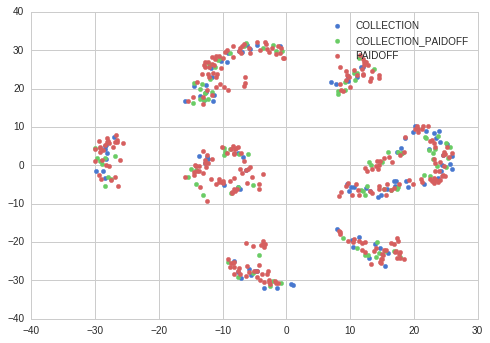

In [25]:
dataset_copy = dataset.copy()

label_loan_status = np.unique(dataset.ix[:, 0].values)

# change strings value into int, sorted by characters
for i in xrange(dataset_copy.ix[:, :].shape[1]):
    if str(type(dataset_copy.ix[0, i])).find('str') > 0:
        dataset_copy.ix[:, i] = LabelEncoder().fit_transform(dataset_copy.ix[:, i])

# first column as cluster classes
Y = dataset_copy.ix[:, 0].values

X = dataset_copy.ix[:, 1:].values

X = StandardScaler().fit_transform(X)
X = TSNE(n_components = 2).fit_transform(X)

for no, _ in enumerate(np.unique(Y)):
    plt.scatter(X[Y == no, 0], X[Y == no, 1], color = current_palette[no], label = label_loan_status[no])
    
plt.legend()
plt.show()

## Speak in general, there is no significant different between hyperparameters in term of {loan_status}

Lets go deeper into visualization

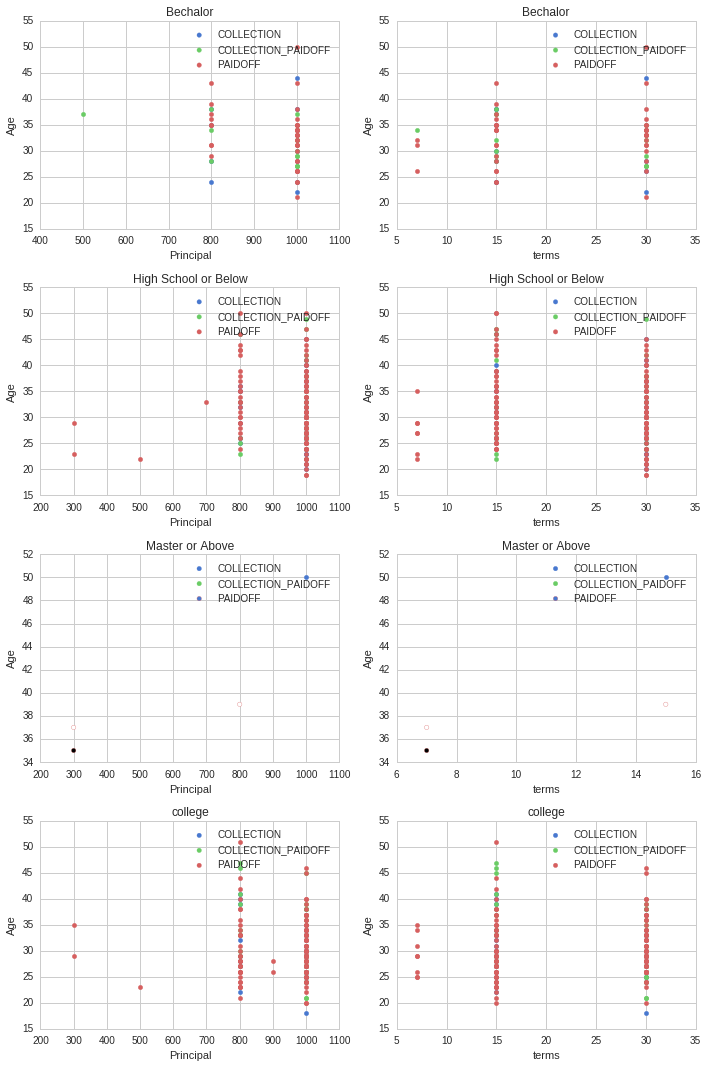

In [57]:
dataset_copy = dataset.copy()

label_loan_status = np.unique(dataset.ix[:, 0].values)
label_education = np.unique(dataset.ix[:, 4].values)

columns = ['Principal', 'terms']

for i in xrange(dataset_copy.ix[:, :].shape[1]):
    if str(type(dataset_copy.ix[0, i])).find('str') > 0:
        dataset_copy.ix[:, i] = LabelEncoder().fit_transform(dataset_copy.ix[:, i])

fig = plt.figure(figsize=(10,15))

Y = dataset['age'].ix[:].values

labelset = dataset_copy['loan_status'].ix[:].values

num = 1

for i in xrange(len(label_education)):
    for k in xrange(len(columns)):
        
        plt.subplot(len(label_education), len(columns), num)
        
        X = dataset_copy[columns[k]].ix[:].values
        
        X = X[dataset_copy['education'].ix[:].values == i]
        
        Y_in = Y[dataset_copy['education'].ix[:].values == i]
           
        labelset_filter = labelset[dataset_copy['education'].ix[:].values == i]
        
        for no, text in enumerate(label_loan_status):
            plt.scatter(X[labelset_filter == no], Y_in[labelset_filter == no], label = text, color = current_palette[no])
        
        plt.legend()
        plt.xlabel(columns[k])
        plt.ylabel('Age')
        plt.title(label_education[i])
        
        num += 1

fig.tight_layout()        
plt.show() 

#### Oh no, what happen to Master and above graphs? That is mean, there are some empty data returned when array to find specific values

Not let we scatter based on gender

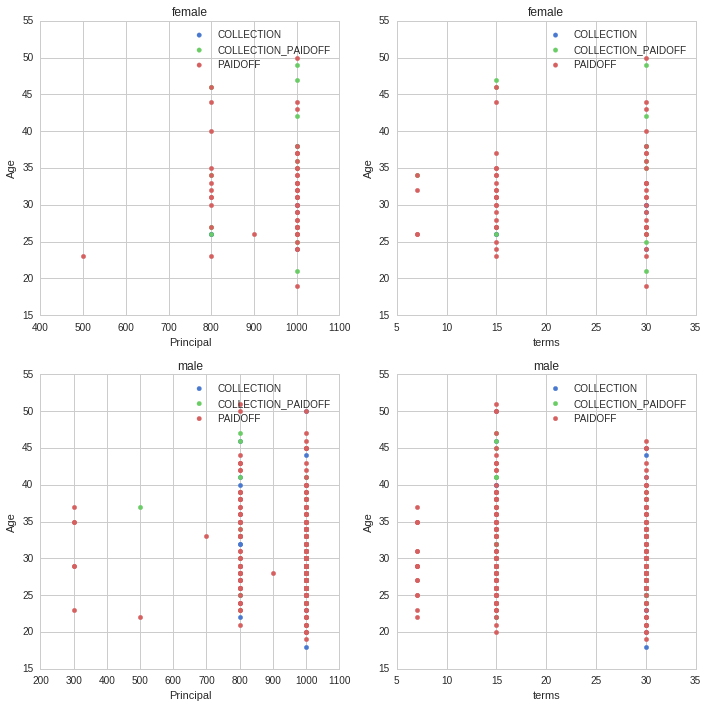

In [63]:
dataset_copy = dataset.copy()

label_loan_status = np.unique(dataset.ix[:, 0].values)
label_gender = np.unique(dataset.ix[:, 5].values)

columns = ['Principal', 'terms']

for i in xrange(dataset_copy.ix[:, :].shape[1]):
    if str(type(dataset_copy.ix[0, i])).find('str') > 0:
        dataset_copy.ix[:, i] = LabelEncoder().fit_transform(dataset_copy.ix[:, i])

fig = plt.figure(figsize=(10,10))

Y = dataset['age'].ix[:].values

labelset = dataset_copy['loan_status'].ix[:].values

num = 1

for i in xrange(len(label_gender)):
    for k in xrange(len(columns)):
        
        plt.subplot(len(label_gender), len(columns), num)
        
        X = dataset_copy[columns[k]].ix[:].values
        
        X = X[dataset_copy['Gender'].ix[:].values == i]
        
        Y_in = Y[dataset_copy['Gender'].ix[:].values == i]
           
        labelset_filter = labelset[dataset_copy['Gender'].ix[:].values == i]
        
        for no, text in enumerate(label_loan_status):
            plt.scatter(X[labelset_filter == no], Y_in[labelset_filter == no], label = text, color = current_palette[no])
        
        plt.legend()
        plt.xlabel(columns[k])
        plt.ylabel('Age')
        plt.title(label_education[i])
        
        num += 1

fig.tight_layout()        
plt.show() 